# Imports


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Loading and cleaning data

In [2]:
# Load data
DATA_PATH = "/Users/teymour/Desktop/cmor438/data/MarketFarePredictionData.csv"
df = pd.read_csv(DATA_PATH)

# Clean data (drop NA)
df = df.dropna(subset=['Average_Fare', 'NonStopMiles', 'MktMilesFlown', 'Pax', 'CarrierPax', 'Market_share', 'Market_HHI', 'LCC_Comp'])

# Gradient boosting model

In [ ]:
# 3. Engineer features
df['fare_per_mile'] = df['Average_Fare'] / df['NonStopMiles']
df['distance_log'] = np.log1p(df['NonStopMiles'])
df['pax_ratio'] = df['CarrierPax'] / df['Pax']
df['fare_log'] = np.log1p(df['Average_Fare'])

# 4. Select features and split
features = ['NonStopMiles', 'MktMilesFlown', 'Pax', 'CarrierPax',
            'Market_share', 'Market_HHI', 'LCC_Comp',
            'fare_per_mile', 'distance_log', 'pax_ratio',
            'RoundTrip', 'Multi_Airport', 'Non_Stop']
X = df[features]
y = df['fare_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Model evaluation

MSE: 98.47
MAE: 6.74
R²: 0.9817
Buffer Accuracy (±$20): 0.9551


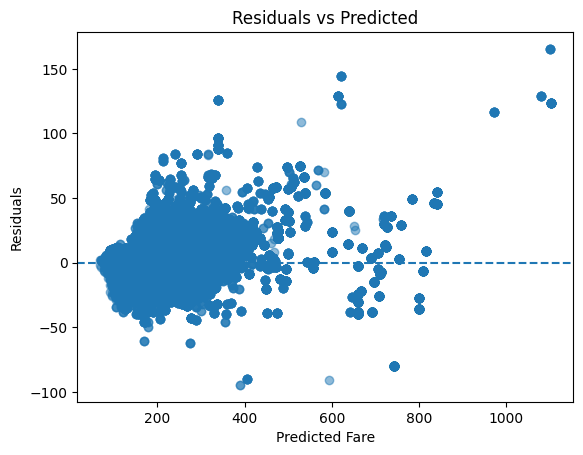

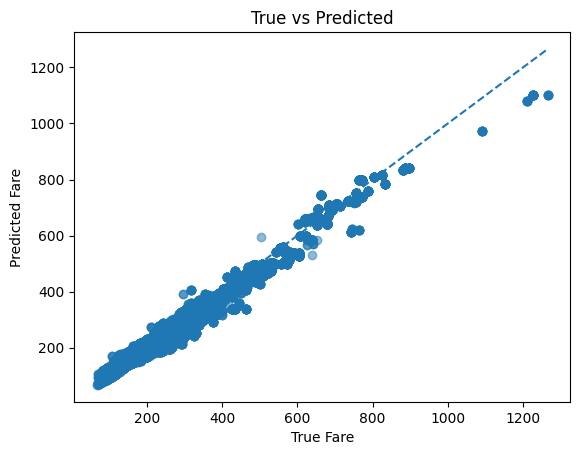

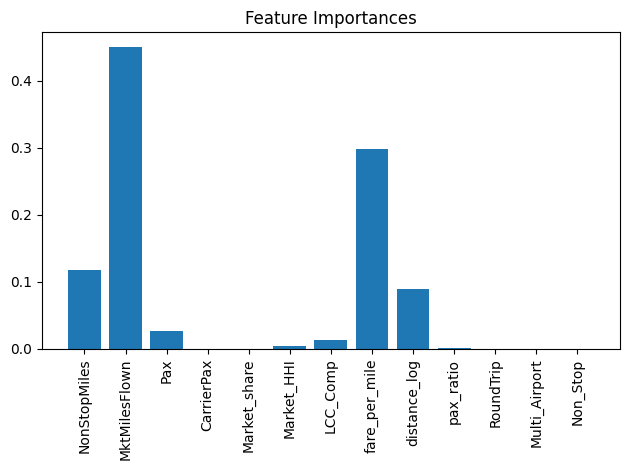

In [4]:
# Predictions
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# 6a. Metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
buffer_accuracy = np.mean(np.abs(y_true - y_pred) <= 20)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"Buffer Accuracy (±$20): {buffer_accuracy:.4f}")

# 6b. Residual plot
residuals = y_true - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# 6c. True vs Predicted scatter
plt.figure()
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--')
plt.xlabel("True Fare")
plt.ylabel("Predicted Fare")
plt.title("True vs Predicted")
plt.show()

# 6d. Feature importances
importances = model.feature_importances_
plt.figure()
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
